In [2]:
# Let's load the dataset first and examine its contents to perform exploratory data analysis (EDA).

import pandas as pd

# Load the dataset
file_path = '/home/cyphersage/Downloads/DBData.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 20
0,Afghanistan,AFG,Dealing with construction permits (DB06-15 met...,IC.CNST.PRMT.DFRN.DB0615,NaN,NaN,24.11,24.11,24.11,24.11,...,24.11,24.11,24.11,24.49,39.38,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Dealing with construction permits (DB16-19 met...,IC.CNST.PRMT.DFRN.DB1619,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,33.70,33.70,33.70,33.70,34.54,NaN
2,Afghanistan,AFG,Dealing with construction permits: Building qu...,IC.DCP.BQC.XD.015.DB1619,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.50,2.50,2.50,2.50,3.00,NaN
3,Afghanistan,AFG,Dealing with construction permits: Building qu...,IC.CNST.PRMT.BQCI.015.DB1619.DFRN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.67,16.67,16.67,16.67,20.00,NaN
4,Afghanistan,AFG,Dealing with construction permits: Cost (% of ...,IC.CNST.PRMT.COST.WRH.VAL,NaN,NaN,166.50,154.10,160.10,112.50,...,85.60,80.50,71.20,66.90,59.40,61.20,66.00,71.70,73.00,NaN


In [6]:
import numpy as np

# Summary of the dataset to understand data types and null values
summary = data.describe(include='all')
null_counts = data.isnull().sum()

# Drop irrelevant columns (e.g., 'Unnamed: 20') and summarize remaining columns
cleaned_data = data.drop(columns=['Unnamed: 20'], errors='ignore')

# Check the structure of cleaned data
structure = cleaned_data.info()

summary, null_counts, structure


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43460 entries, 0 to 43459
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    43460 non-null  object 
 1   Country Code    43460 non-null  object 
 2   Indicator Name  43460 non-null  object 
 3   Indicator Code  43460 non-null  object 
 4   2004            4037 non-null   float64
 5   2005            6616 non-null   float64
 6   2006            14026 non-null  float64
 7   2007            14351 non-null  float64
 8   2008            14595 non-null  float64
 9   2009            14677 non-null  float64
 10  2010            16230 non-null  float64
 11  2011            16232 non-null  float64
 12  2012            17512 non-null  float64
 13  2013            17883 non-null  float64
 14  2014            25445 non-null  float64
 15  2015            34084 non-null  float64
 16  2016            33650 non-null  float64
 17  2017            32799 non-null 

(       Country Name Country Code  \
 count         43460        43460   
 unique          212          212   
 top     Afghanistan          AFG   
 freq            205          205   
 mean            NaN          NaN   
 std             NaN          NaN   
 min             NaN          NaN   
 25%             NaN          NaN   
 50%             NaN          NaN   
 75%             NaN          NaN   
 max             NaN          NaN   
 
                                            Indicator Name  \
 count                                               43460   
 unique                                                205   
 top     Dealing with construction permits (DB06-15 met...   
 freq                                                  212   
 mean                                                  NaN   
 std                                                   NaN   
 min                                                   NaN   
 25%                                                   NaN

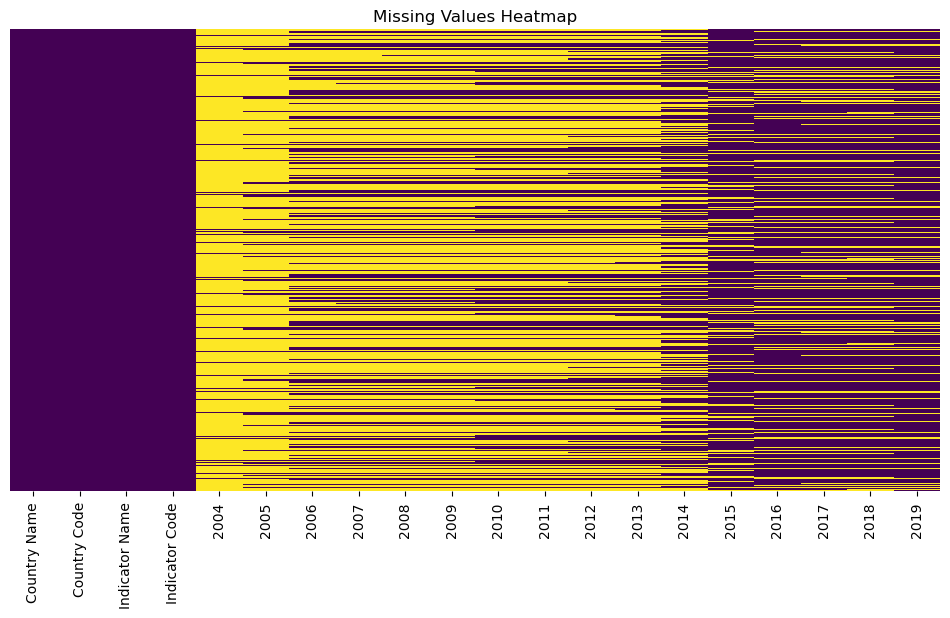

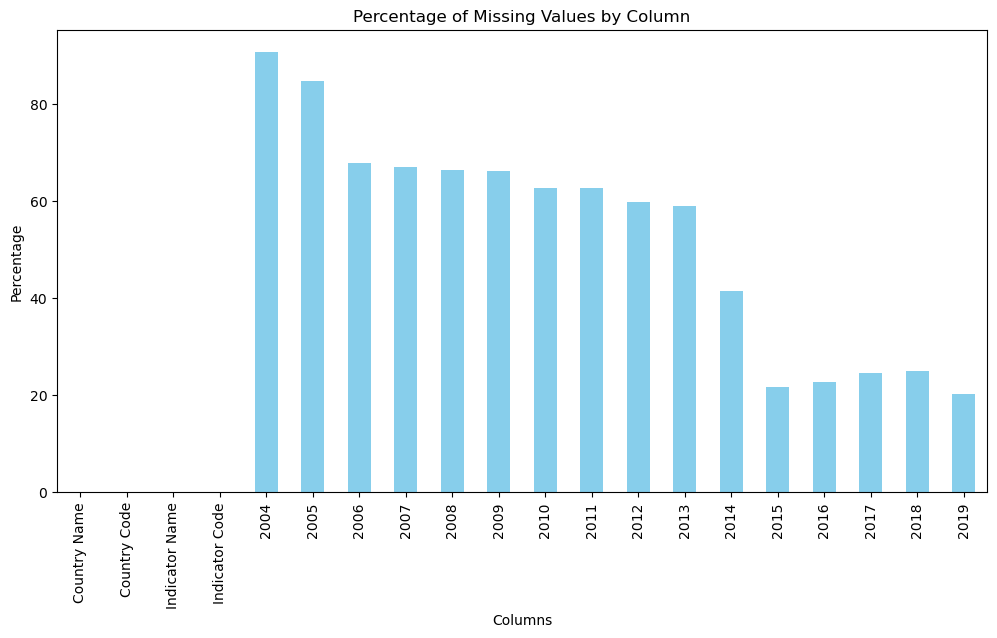

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap to visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(cleaned_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Percentage of missing values by column
missing_percentage = (cleaned_data.isnull().sum() / len(cleaned_data)) * 100
missing_percentage.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()


In [10]:
# Selecting a subset of the data for visualization: focusing on a specific indicator and country.
# Example: Dealing with construction permits for Afghanistan.

afghanistan_data = cleaned_data[cleaned_data['Country Name'] == 'Afghanistan']
selected_indicator = "Dealing with construction permits (DB06-15 methodology)"
afghanistan_indicator_data = afghanistan_data[afghanistan_data['Indicator Name'] == selected_indicator]

# Transposing the time-series data for visualization
time_series_data = afghanistan_indicator_data.loc[:, '2004':'2019'].T
time_series_data.columns = ['Value']
time_series_data.index.name = 'Year'
time_series_data.reset_index(inplace=True)

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Year'], time_series_data['Value'], marker='o', linestyle='-', color='b')
plt.title(f"Trend of '{selected_indicator}' in Afghanistan (2004-2019)")
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


ValueError: Length mismatch: Expected axis has 0 elements, new values have 1 elements

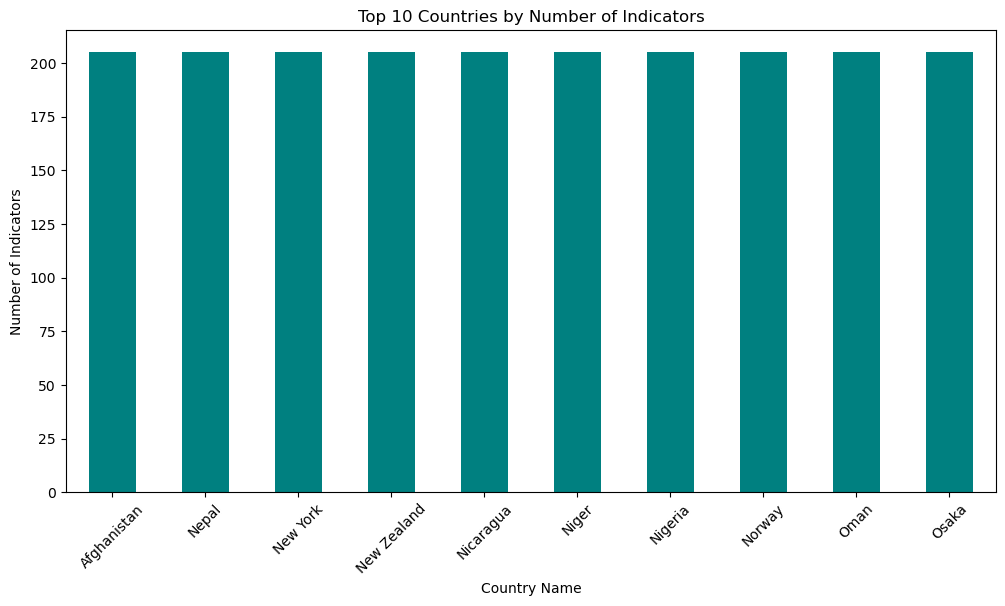

In [26]:
# 1. Bar Plot: Number of indicators per country
country_counts = cleaned_data['Country Name'].value_counts()
plt.figure(figsize=(12, 6))
country_counts.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Number of Indicators')
plt.xlabel('Country Name')
plt.ylabel('Number of Indicators')
plt.xticks(rotation=45)
plt.show()










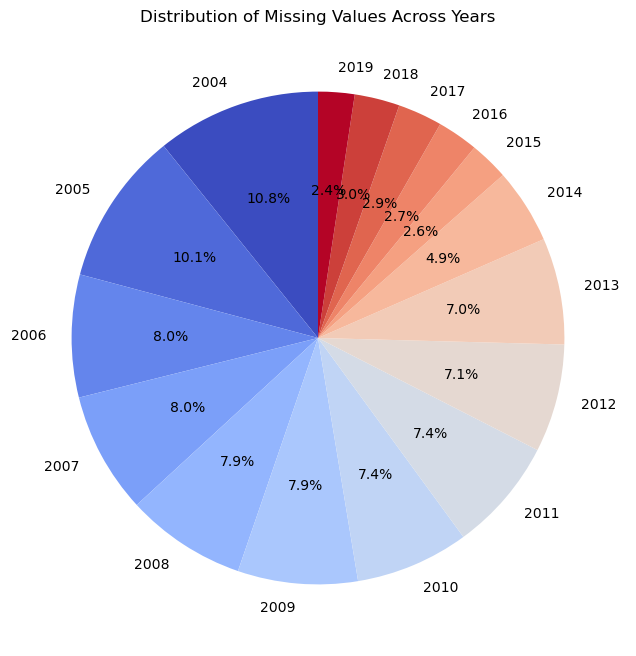

In [24]:
# 2. Pie Chart: Distribution of missing values across time-series columns
time_series_columns = cleaned_data.loc[:, '2004':'2019']
missing_distribution = time_series_columns.isnull().sum()
plt.figure(figsize=(8, 8))
missing_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Distribution of Missing Values Across Years')
plt.ylabel('')  # Remove y-axis label for better appearance
plt.show()


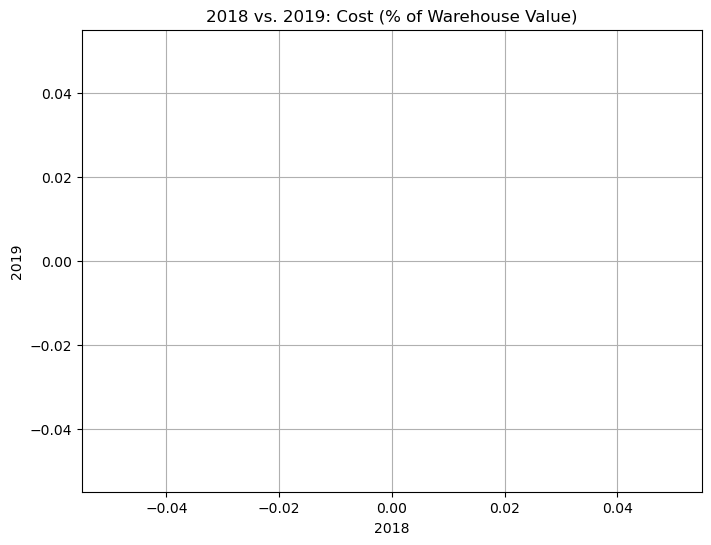

In [22]:
# 3. Scatter Plot: 2018 vs. 2019 for a specific indicator
indicator_filter = cleaned_data['Indicator Name'] == "Dealing with construction permits: Cost (% of warehouse value)"
scatter_data = cleaned_data[indicator_filter].loc[:, ['2018', '2019']].dropna()
plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['2018'], scatter_data['2019'], alpha=0.6, color='orange', edgecolors='k')
plt.title('2018 vs. 2019: Cost (% of Warehouse Value)')
plt.xlabel('2018')
plt.ylabel('2019')
plt.grid(True)
plt.show()


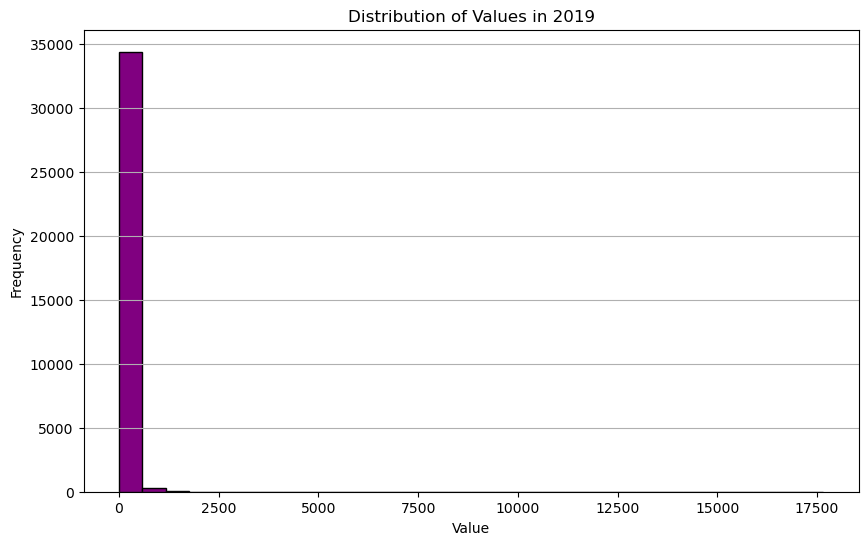

In [20]:
# 4. Histogram: Distribution of values for the year 2019
plt.figure(figsize=(10, 6))
cleaned_data['2019'].dropna().plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Values in 2019')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


/home/cyphersage/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


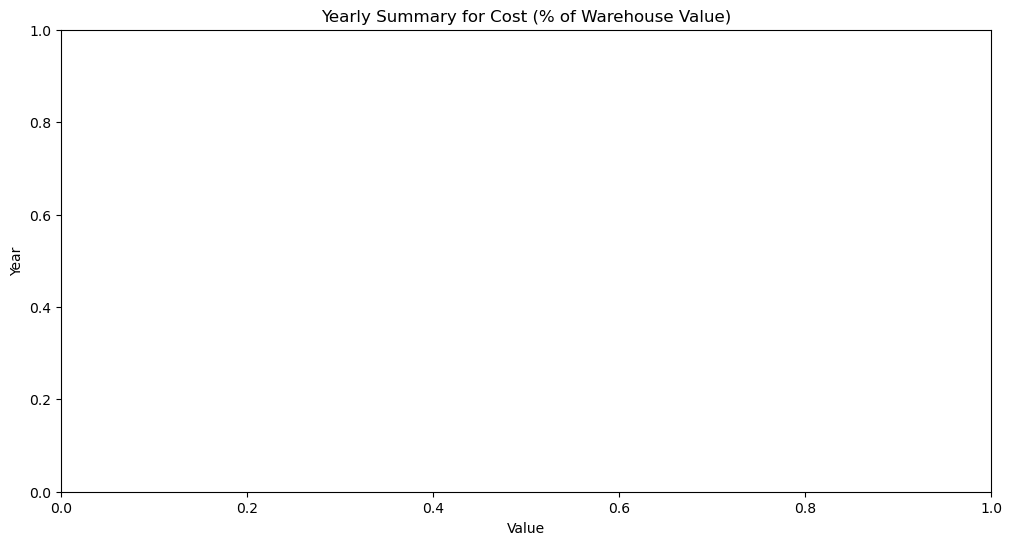

In [18]:
# 5. Box Plot: Yearly statistics for a specific indicator
indicator_boxplot = cleaned_data[indicator_filter].loc[:, '2004':'2019']
plt.figure(figsize=(12, 6))
sns.boxplot(data=indicator_boxplot, orient='h', palette='Set2')
plt.title('Yearly Summary for Cost (% of Warehouse Value)')
plt.xlabel('Value')
plt.ylabel('Year')
plt.show()


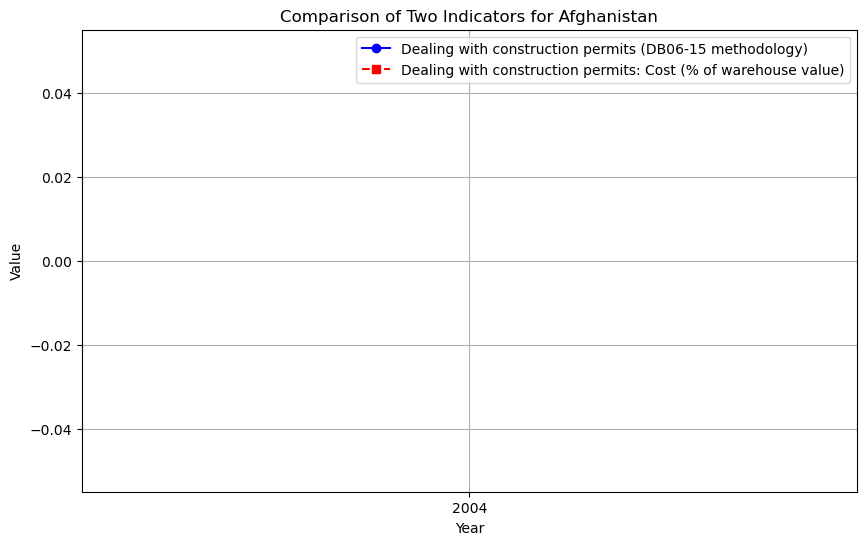

In [16]:
# 6. Line Plot: Comparison of trends for two indicators for Afghanistan
afghanistan_subset = cleaned_data[cleaned_data['Country Name'] == 'Afghanistan']
indicator_1 = "Dealing with construction permits (DB06-15 methodology)"
indicator_2 = "Dealing with construction permits: Cost (% of warehouse value)"

trend_1 = afghanistan_subset[afghanistan_subset['Indicator Name'] == indicator_1].loc[:, '2004':'2019'].mean()
trend_2 = afghanistan_subset[afghanistan_subset['Indicator Name'] == indicator_2].loc[:, '2004':'2019'].mean()

plt.figure(figsize=(10, 6))
plt.plot(trend_1.index, trend_1.values, label=indicator_1, marker='o', linestyle='-', color='blue')
plt.plot(trend_2.index, trend_2.values, label=indicator_2, marker='s', linestyle='--', color='red')
plt.title('Comparison of Two Indicators for Afghanistan')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

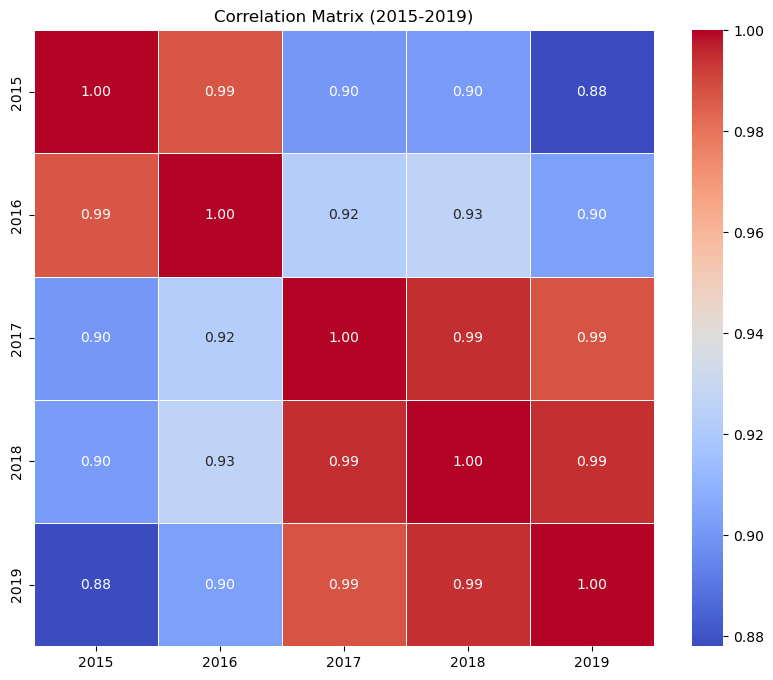

In [14]:
# 7. Heatmap: Correlation matrix for 2015–2019 values
selected_years = cleaned_data.loc[:, '2015':'2019'].dropna()
correlation_matrix = selected_years.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (2015-2019)')
plt.show()